In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [1]:
!pwd
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/food_supply")

/content
Mounted at /content/drive


In [4]:
data = pd.read_csv("dataset1.csv")
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,Rice,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,Wheat,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,Rice,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,Wheat,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,Wheat,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
data.shape

(100, 24)

In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [ ]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [8]:
data.dtypes

,0
Product type,object
SKU,object
Price,float64
Availability,int64
Number of products sold,int64
Revenue generated,float64
Customer demographics,object
Stock levels,int64
Lead times,int64
Order quantities,int64


In [11]:
missing_values = data.isnull().any(axis=1)
print("Rows with missing values:")
print(missing_values)
duplicate_values = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_values)
data.dropna(axis=0,inplace=True)
data.drop_duplicates(inplace=True)

Rows with missing values:
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool
Duplicate Rows:
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs]
Index: []

[0 rows x 24 columns]


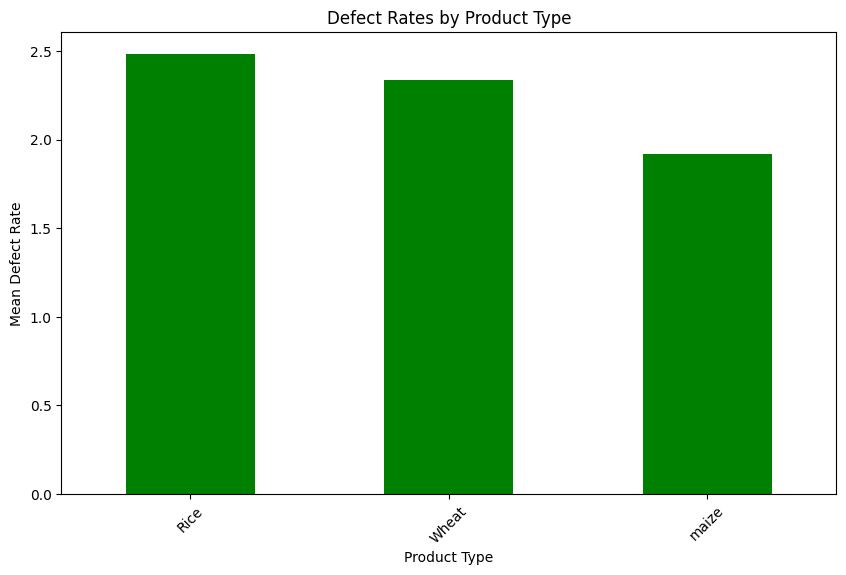

In [15]:
defect_rate_by_product = data.groupby("Product type")["Defect rates"].mean()
defect_rate_by_product = data.groupby("Product type")["Defect rates"].mean()

plt.figure(figsize=(10,6))
defect_rate_by_product.plot(kind="bar",color='green')
plt.title("Defect Rates by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Mean Defect Rate")
plt.xticks(rotation=45)
plt.show()

In [16]:
selected_columns = ["SKU","Lead times","Stock levels"]
risk_data = data[selected_columns]
risk_data["Risk Score"] = risk_data["Lead times"] * (1-risk_data["Stock levels"])
risk_data = risk_data.sort_values(by="Risk Score", ascending=False)
print("Top 15 high risk SKUs")
print(risk_data.head(15))


Top 15 high risk SKUs
      SKU  Lead times  Stock levels  Risk Score
68  SKU68           8             0           8
2    SKU2          10             1           0
34  SKU34          26             1           0
16  SKU16           5             2          -5
4    SKU4           3             5         -12
78  SKU78           4             5         -16
87  SKU87           7             5         -28
76  SKU76           1            38         -37
8    SKU8          10             5         -40
47  SKU47          15             4         -45
58  SKU58           5            10         -45
33  SKU33          17             4         -51
98  SKU98           1            53         -52
15  SKU15           8             9         -64
38  SKU38           1            69         -68


<ipython-input-16-fd0e479b15c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_data["Risk Score"] = risk_data["Lead times"] * (1-risk_data["Stock levels"])


In [19]:
HoldingCost = 0.2
D = data["Number of products sold"]
S = data["Costs"]
H = data["Number of products sold"] * HoldingCost
EOQ = np.sqrt((2*S*D)/H)

data["Current Order Quantity"] = data["Order quantities"]
data["EOQ"] = EOQ.astype(int)
comparison_columns = ["SKU","EOQ","Current Order Quantity"]
print(data[comparison_columns])



      SKU  EOQ  Current Order Quantity
0    SKU0   43                      96
1    SKU1   70                      37
2    SKU2   37                      88
3    SKU3   50                      59
4    SKU4   96                      56
..    ...  ...                     ...
95  SKU95   88                      26
96  SKU96   43                      32
97  SKU97   73                       4
98  SKU98   93                      27
99  SKU99   45                      59

[100 rows x 3 columns]


In [20]:
mean_revenue = data.groupby(['Customer demographics','Product type'])['Revenue generated'].mean().reset_index()
sum_revenue = data.groupby(['Customer demographics','Product type'])['Revenue generated'].sum().reset_index()
print("Mean Revenue for Each Customer Demographics")
print(mean_revenue)
print("Sum Revenue for Each Customer Demographics")
print(sum_revenue)

Mean Revenue for Each Customer Demographics
   Customer demographics Product type  Revenue generated
0                 Female         Rice        6362.416641
1                 Female        Wheat        6095.470280
2                 Female        maize        6954.854220
3                   Male         Rice        5059.992731
4                   Male        Wheat        7806.214493
5                   Male        maize        5347.741374
6             Non-binary         Rice        5567.306726
7             Non-binary        Wheat        4650.833888
8             Non-binary        maize        5247.096332
9                Unknown         Rice        4810.632195
10               Unknown        Wheat        6287.152696
11               Unknown        maize        6335.182378
Sum Revenue for Each Customer Demographics
   Customer demographics Product type  Revenue generated
0                 Female         Rice       12724.833283
1                 Female        Wheat       79241.113641
2

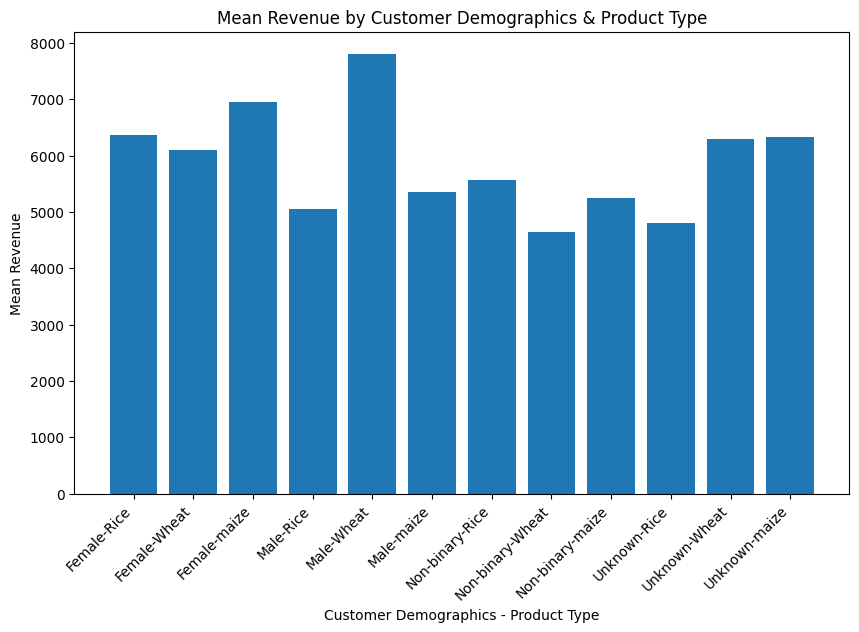

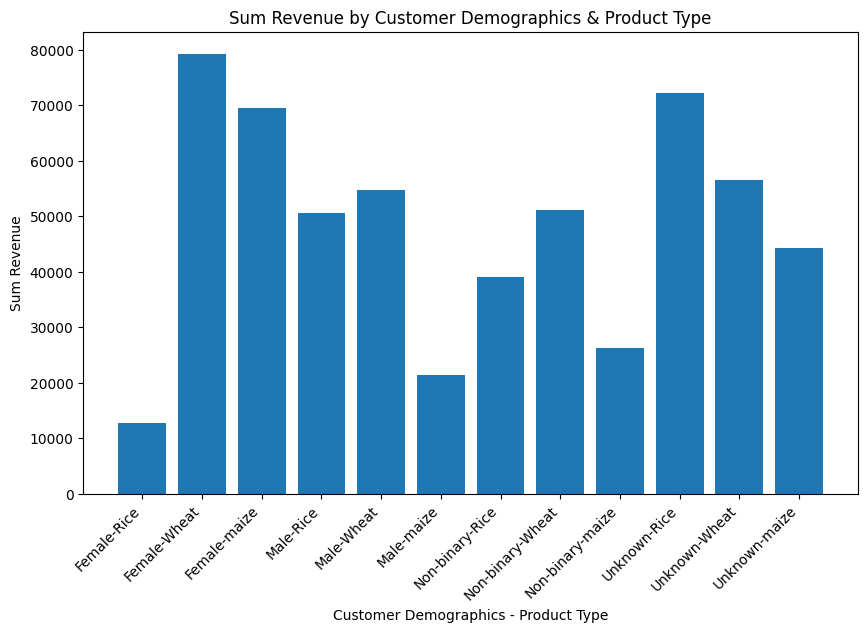

In [21]:
plt.figure(figsize=(10,6))
plt.bar(mean_revenue["Customer demographics"] + '-' + mean_revenue["Product type"], mean_revenue["Revenue generated"])
plt.xlabel("Customer Demographics - Product Type")
plt.ylabel("Mean Revenue")
plt.title("Mean Revenue by Customer Demographics & Product Type")
plt.xticks(rotation=45,ha='right')
plt.tight_layout
plt.show()

plt.figure(figsize=(10,6))
plt.bar(sum_revenue["Customer demographics"] + '-' + sum_revenue["Product type"], sum_revenue["Revenue generated"])
plt.xlabel("Customer Demographics - Product Type")
plt.ylabel("Sum Revenue")
plt.title("Sum Revenue by Customer Demographics & Product Type")
plt.xticks(rotation=45,ha='right')
plt.tight_layout
plt.show()

In [22]:
lead_times_column = "Lead times"
transportation_modes_column = "Transportation modes"
routes_column = "Routes"

average_lead_time_by_mode = data.groupby(transportation_modes_column)[lead_times_column].mean().reset_index()

best_transportation_mode = average_lead_time_by_mode.loc[average_lead_time_by_mode[lead_times_column].idxmin()]

best_mode = data[data[transportation_modes_column]==best_transportation_mode[transportation_modes_column]]

average_lead_time_by_route = data.groupby(routes_column)[lead_times_column].mean().reset_index()

best_route = average_lead_time_by_route.loc[average_lead_time_by_route[lead_times_column].idxmin()]


In [23]:
print("Average Lead Times by Transportation Mode:")
print(average_lead_time_by_mode)
print("The Best Transportation Mode (Shortest Average Lead Time):")
print(best_transportation_mode)
print("The Average Lead Times by Route within the Best Transportation Mode:")
print(average_lead_time_by_route)
print("The Best Routes (Shortest Average Lead Times) within the Best Transportation Mode:")
print(best_route)

Average Lead Times by Transportation Mode:
  Transportation modes  Lead times
0                  Air   18.269231
1                 Rail   14.892857
2                 Road   17.137931
3                  Sea   12.176471
The Best Transportation Mode (Shortest Average Lead Time):
Transportation modes          Sea
Lead times              12.176471
Name: 3, dtype: object
The Average Lead Times by Route within the Best Transportation Mode:
    Routes  Lead times
0  Route A   14.697674
1  Route B   17.216216
2  Route C   16.350000
The Best Routes (Shortest Average Lead Times) within the Best Transportation Mode:
Routes          Route A
Lead times    14.697674
Name: 0, dtype: object


In [25]:
target_column = "Number of products sold"
features = ['Price','Availability','Stock levels','Lead times','Order quantities']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data[target_column],
                                                    test_size=0.2, random_state=42)

In [27]:
train_data = lgb.Dataset(x_train, label=y_train)

In [28]:
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate':0.05,
    'feature_fraction': 0.9
}

In [30]:
num_round = 100
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 453.200000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [33]:
y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)
x_test

,Price,Availability,Stock levels,Lead times,Order quantities
83,68.911246,82,65,24,7
53,30.341471,93,96,25,54
70,47.914542,90,10,12,22
45,33.784138,1,93,7,52
44,51.355791,34,13,19,72
39,19.127477,26,78,29,34
22,27.679781,55,71,1,63
80,91.128318,75,39,14,41
10,15.707796,11,51,13,80
0,69.808006,55,58,7,96


In [32]:
print("Forecasted Customer Demand:", y_pred)

Forecasted Customer Demand: [602.26477999 462.50809993 470.25702294 382.77090386 325.46704061
 413.25164768 375.62754257 557.18903774 332.66809798 444.34647958
 346.02050077 409.1354491  497.41937115 360.4174601  336.97107195
 346.89585609 442.85618876 354.04827904 570.12310461 269.46575199]


In [35]:
target_column = "Manufacturing costs"
feature_column = "Production volumes"

In [36]:
x = data[feature_column].values.reshape(-1,1)
y = data[target_column].values

In [37]:
scaler = MinMaxScaler()
x_scaled = scaler.fit(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_column], data[target_column],
                                                    test_size=0.2, random_state=42)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_dim=1),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam',loss='mean_square_error')

In [41]:
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (100, 1)
y shape: (100,)


In [42]:
min_production_volume = data["Order quantities"].min()
max_production_volume = 1000
step_size = 10

In [43]:
cheapest_cost = float("inf")
best_production_volume = None

In [44]:
for production_volume in range(min_production_volume,max_production_volume + 1, step_size):
    normalized_production_volume = scaler.transform(np.array([[production_volume]]))
    predicted_cost = model.predict(normalized_production_volume)
    if production_volume == best_production_volume:
        best_cost = predicted_cost[0][0]
    if predicted_cost[0][0] >= 0:
        cheapest_cost = predicted_cost[0][0]
        best_production_volume = production_volume
print("The Most Optimal Production Volume to Minimize Manufacturing Cost:", best_production_volume)
print("The Cheapest Manufacturing Cost", cheapest_cost)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [46]:
target_column = "Number of products sold"
features = ['Price','Availability','Stock levels','Lead times','Order quantities']

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []

x_train, x_test, y_train, y_test = train_test_split(data[features], data[target_column],
                                                    test_size=0.2, random_state=42)

In [47]:
for train_index, test_index in kf.split(data):
    train_data = data.loc[train_index, features]
    train_target = data.loc[train_index, target_column]
    test_data = data.loc[test_index, features]
    test_target = data.loc[test_index, target_column]

In [48]:
train_data = lgb.Dataset(x_train, label=y_train)
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate':0.05,
    'feature_fraction': 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 453.200000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [50]:
y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)
print("Forecasted Customer Demand:", y_pred)

Forecasted Customer Demand: [602.26477999 462.50809993 470.25702294 382.77090386 325.46704061
 413.25164768 375.62754257 557.18903774 332.66809798 444.34647958
 346.02050077 409.1354491  497.41937115 360.4174601  336.97107195
 346.89585609 442.85618876 354.04827904 570.12310461 269.46575199]


In [51]:
mse = mean_squared_error(test_target,y_pred)
mse_scores.append(mse)
average_mse = sum(mse_scores)/num_folds
print("Average MSE:")
print(average_mse)

Average MSE:
13258.838709275815
